In [24]:
#cargar las librerias necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import style
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#lectura de datos en python
Datos = pd.read_csv('./heart_cleveland_upload.csv')

In [3]:
#lectura de datos para el anlisis
Datos.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
#descripcion de dartos
Datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de datos faltantes o Atípicos')

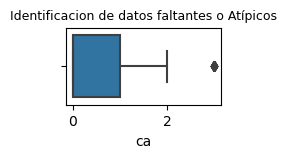

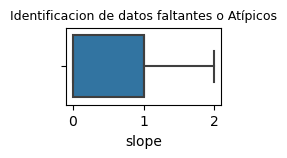

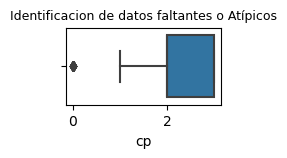

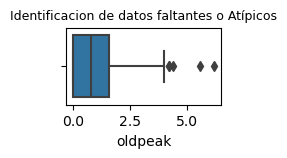

In [5]:
#identificacion de datos faltantes
plt.figure(figsize=(2, 1))
sns.boxplot(x=Datos['ca'])
plt.title('Identificacion de datos faltantes o Atípicos', fontsize=9)
plt.figure(figsize=(2, 1))
sns.boxplot(x=Datos['slope'])
plt.title('Identificacion de datos faltantes o Atípicos', fontsize=9)
plt.figure(figsize=(2, 1))
sns.boxplot(x=Datos['cp'])
plt.title('Identificacion de datos faltantes o Atípicos', fontsize=9)
plt.figure(figsize=(2, 1))
sns.boxplot(x=Datos['oldpeak'])
plt.title('Identificacion de datos faltantes o Atípicos', fontsize=9)

In [6]:
#revision de datos faltantes.
print("Cantidad de registros con cero en Cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de registros con cero en Fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de registros con cero en Restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de registros con cero en Exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de registros con cero en Oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de registros con cero en Slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de registros con cero en Ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de registros con cero en Thal: ",Datos['thal'].isin([0]).sum())

Cantidad de registros con cero en Cp:  23
Cantidad de registros con cero en Fbs:  254
Cantidad de registros con cero en Restecg:  147
Cantidad de registros con cero en Exang:  200
Cantidad de registros con cero en Oldpeak:  96
Cantidad de registros con cero en Slope:  139
Cantidad de registros con cero en Ca:  174
Cantidad de registros con cero en Thal:  164


In [7]:
#reemplazar los datos en cero con el valor promedio
Datos['cp']=Datos['cp'].replace(0,Datos['cp'].mean())
Datos['fbs']=Datos['fbs'].replace(0,Datos['fbs'].mean())
Datos['restecg']=Datos['restecg'].replace(0,Datos['restecg'].mean())
Datos['exang']=Datos['exang'].replace(0,Datos['exang'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0,Datos['oldpeak'].mean())
Datos['slope']=Datos['slope'].replace(0,Datos['slope'].mean())
Datos['ca']=Datos['ca'].replace(0,Datos['ca'].mean())
Datos['thal']=Datos['thal'].replace(0,Datos['thal'].mean())

In [8]:
#revisar nuevamente los datos faltasntes
print("Cantidad de registros con cero en Cp: ",Datos['cp'].isin([0]).sum())
print("Cantidad de registros con cero en Fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de registros con cero en Restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de registros con cero en Exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de registros con cero en Oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de registros con cero en Slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de registros con cero en Ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de registros con cero en Thal: ",Datos['thal'].isin([0]).sum())

Cantidad de registros con cero en Cp:  0
Cantidad de registros con cero en Fbs:  0
Cantidad de registros con cero en Restecg:  0
Cantidad de registros con cero en Exang:  0
Cantidad de registros con cero en Oldpeak:  0
Cantidad de registros con cero en Slope:  0
Cantidad de registros con cero en Ca:  0
Cantidad de registros con cero en Thal:  0


Text(0.5, 1.0, 'Identificacion de datos faltantes o Atípicos')

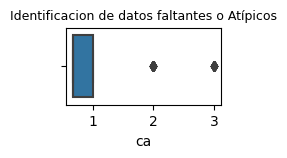

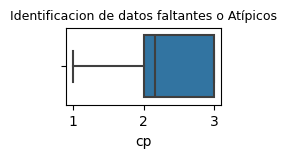

In [9]:
#identificacion de datos atipicos
plt.figure(figsize=(2, 1))
sns.boxplot(x=Datos['ca'])
plt.title('Identificacion de datos faltantes o Atípicos', fontsize=9)
plt.figure(figsize=(2, 1))
sns.boxplot(x=Datos['cp'])
plt.title('Identificacion de datos faltantes o Atípicos', fontsize=9)

In [10]:
#conteo dedatos atipicos
nivel_minimo=1.0
nivel_maximo=2.0
Total_Atipicos=((Datos ['cp']<nivel_minimo)|(Datos['cp']>nivel_maximo)).sum()
print("El  total de datos atipicos es {}".format(Total_Atipicos))
nivel_minimo=1.0
nivel_maximo=3.0
Total_Atipicos=((Datos ['ca']<nivel_minimo)|(Datos['ca']>nivel_maximo)).sum()
print("El  total de datos atipicos es {}".format(Total_Atipicos))

El  total de datos atipicos es 165
El  total de datos atipicos es 174


In [11]:
#filtro datos atipicos
Datos=Datos[(Datos['ca']<nivel_maximo)&(Datos['ca']>nivel_minimo)]
Datos=Datos[(Datos['cp']<nivel_maximo)&(Datos['cp']>nivel_minimo)]

In [12]:
#Validar datos atipicos
Total_Atipicos=((Datos ['ca']<nivel_minimo)|(Datos['ca']>nivel_maximo)).sum()
print("El  total de datos atipicos es {}".format(Total_Atipicos))
Total_Atipicos=((Datos ['cp']<nivel_minimo)|(Datos['cp']>nivel_maximo)).sum()
print("El  total de datos atipicos es {}".format(Total_Atipicos))

El  total de datos atipicos es 0
El  total de datos atipicos es 0


In [13]:
#revision de tipo de datos
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1 to 131
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        6 non-null      int64  
 1   sex        6 non-null      int64  
 2   cp         6 non-null      float64
 3   trestbps   6 non-null      int64  
 4   chol       6 non-null      int64  
 5   fbs        6 non-null      float64
 6   restecg    6 non-null      float64
 7   thalach    6 non-null      int64  
 8   exang      6 non-null      float64
 9   oldpeak    6 non-null      float64
 10  slope      6 non-null      float64
 11  ca         6 non-null      float64
 12  thal       6 non-null      float64
 13  condition  6 non-null      int64  
dtypes: float64(8), int64(6)
memory usage: 720.0 bytes


In [14]:
#total de personas con enfermedad cardiaca
Datos['condition'].value_counts()

condition
0    3
1    3
Name: count, dtype: int64

In [15]:
Datos[['condition']].head(40)

,condition
1,0
7,1
12,1
19,0
100,1
131,0


In [16]:
#crear variables X y Y 

X = Datos.drop('condition',axis=1) 
Y = Datos['condition']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [17]:
print (X_train)

     age  sex        cp  trestbps  chol       fbs   restecg  thalach  \
131   48    1  2.000000       124   255  1.000000  0.996633      175   
100   58    1  2.000000       132   224  0.144781  2.000000      173   
19    42    1  2.158249       148   244  0.144781  2.000000      178   
7     61    1  2.158249       134   234  0.144781  0.996633      145   

        exang   oldpeak     slope   ca      thal  
131  0.326599  1.055556  0.602694  2.0  0.835017  
100  0.326599  3.200000  0.602694  2.0  2.000000  
19   0.326599  0.800000  0.602694  2.0  0.835017  
7    0.326599  2.600000  1.000000  2.0  0.835017  


In [18]:
print (Y_train)

131    0
100    1
19     0
7      1
Name: condition, dtype: int64


In [25]:
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [26]:
print(Y_test)

1     0
12    1
Name: condition, dtype: int64


In [27]:
print(Prediccion)

[1 1]


In [28]:
# Desempeño del modelo de regresión

print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Nico\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nico\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nico\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


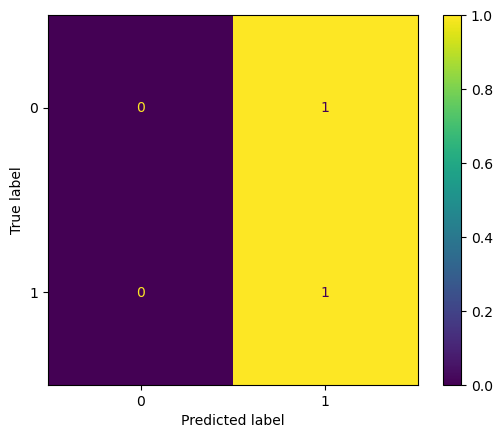

In [29]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

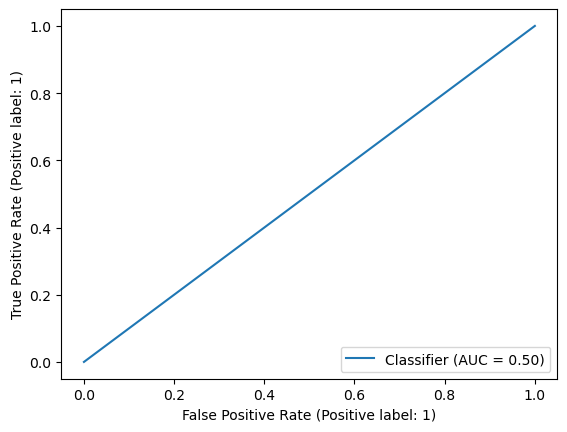

In [30]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()